# Crime Weather correlation project

The goal of this project is to examine crime data and weather data and find any correlations between crime in NYC and historical weather. 

Crime data was gathered from Professor Panos Ipeirotis's `nypd_complaints` SQL database.
Weather data comes from the `dwd_2019_group_d_weather` table on the `public` database.

## Setup

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 7)

In [4]:
from sqlalchemy import create_engine

In [5]:
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset=utf8'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='public',
    encoding = 'utf-8'
)
engine = create_engine(conn_string)

In [6]:
# Due to the size of the data, we limited analysis to 2015 and 2016

begin_date = '2015-01-01'
end_date = '2017-01-01'

## Data gathering

### Import Crime Data

In [7]:
query_crime = '''
SELECT 
    *,
    DATE_FORMAT(CMPLNT_FR, %s) AS ROUNDED_CMPLNT_FR
FROM nypd_complaints.nypd
WHERE CMPLNT_FR >= %s AND CMPLNT_FR < %s;
'''

In [8]:
%%time
# This may take up to a minute
df_crime = pd.read_sql(query_crime, con=engine, params=("'%Y-%m-%d %H:00:00'", begin_date, end_date,))


CPU times: user 38 s, sys: 771 ms, total: 38.7 s
Wall time: 55.9 s


### Import Weather Data

In [9]:
query_weather = '''
SELECT 
    *
FROM public.dwd_2019_group_d_weather
WHERE dt_iso >= %s AND dt_iso < %s;
'''

In [10]:
%%time
df_weather = pd.read_sql(query_weather, con=engine, params=(begin_date, end_date,))

CPU times: user 198 ms, sys: 26 µs, total: 198 ms
Wall time: 384 ms


In [11]:
df_weather

,dt,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,rained_24h,rained_today,snowed_1h,snowed_3h,snowed_24h,snowed_today,clouds_all,weather_id,weather_main,weather_description
0,1420070400,2015-01-01 00:00:00,5128581,268.050000,268.050000,268.050000,1022,59,2,249,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
1,1420074000,2015-01-01 01:00:00,5128581,267.186000,267.186000,267.186000,1021,58,2,246,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
2,1420077600,2015-01-01 02:00:00,5128581,267.186000,267.186000,267.186000,1021,58,2,246,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
3,1420081200,2015-01-01 03:00:00,5128581,267.186000,267.186000,267.186000,1021,58,2,246,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
4,1420084800,2015-01-01 04:00:00,5128581,266.667000,266.667000,266.667000,1019,52,3,251,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
5,1420088400,2015-01-01 05:00:00,5128581,266.667000,266.667000,266.667000,1019,52,3,251,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
6,1420092000,2015-01-01 06:00:00,5128581,266.667000,266.667000,266.667000,1019,52,3,251,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
7,1420095600,2015-01-01 07:00:00,5128581,266.576000,266.576000,266.576000,1018,57,3,258,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
8,1420099200,2015-01-01 08:00:00,5128581,266.576000,266.576000,266.576000,1018,57,3,258,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear
9,1420102800,2015-01-01 09:00:00,5128581,266.576000,266.576000,266.576000,1018,57,3,258,...,None,None,None,None,None,None,0,800,Clear,Sky is Clear


In [12]:
# Add Celcius and Farenheit temperatures to table
df_weather["temp_c"] = df_weather["temp"] - 273
df_weather["temp_f"] = (df_weather["temp_c"] * 1.8) + 32


### Join Crime and Weather Data

In [13]:
%%time
# This may take 2-3 mintues
df_crimes_weather = df_crime.set_index('ROUNDED_CMPLNT_FR').join(df_weather.set_index('dt_iso'))


CPU times: user 1min 59s, sys: 59.8 ms, total: 1min 59s
Wall time: 2min 5s


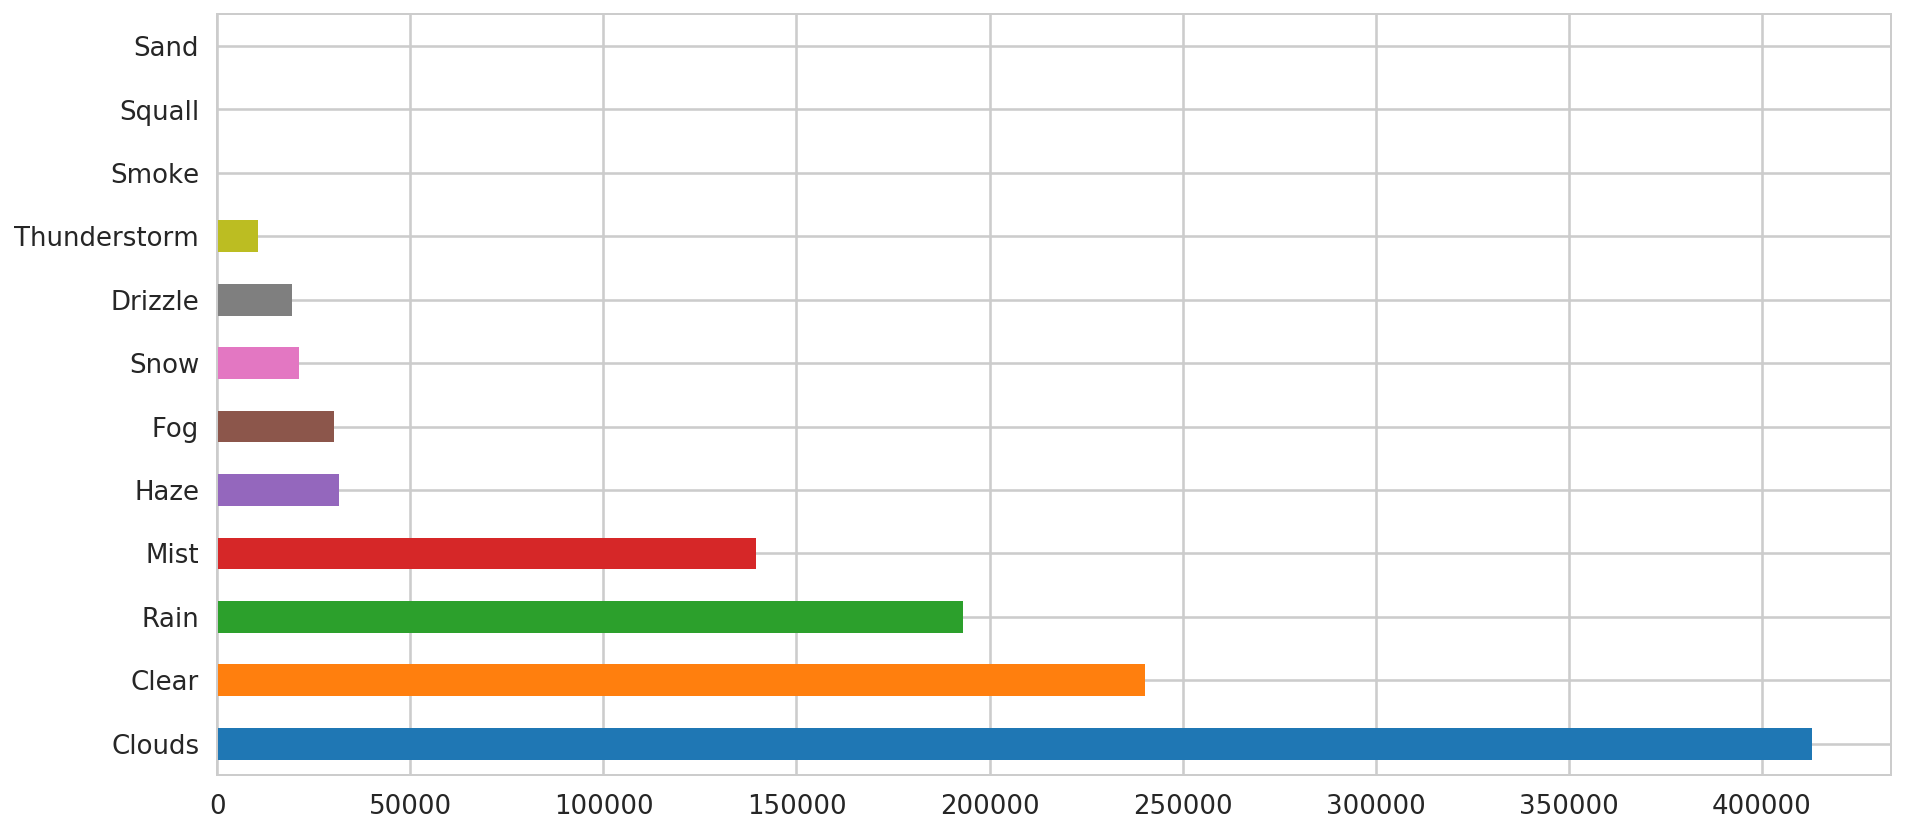

In [14]:
df_crimes_weather['weather_main'].value_counts().plot(kind='barh')

## Crimes per hour during different weather conditions

Import Weather Data by Type

In [16]:
query_weather = '''
SELECT weather_main, COUNT(*) as num_hours
FROM public.dwd_2019_group_d_weather
WHERE dt_iso >= %s AND dt_iso < %s
GROUP BY weather_main
ORDER BY num_hours DESC;
'''

In [17]:
%%time
df_weather_hours = pd.read_sql(query_weather, con=engine, params=(begin_date, end_date,))


CPU times: user 4.06 ms, sys: 31 µs, total: 4.1 ms
Wall time: 1.01 s


In [18]:
df_weather_hours


,weather_main,num_hours
0,Clouds,7237
1,Clear,4724
2,Rain,3584
3,Mist,2796
4,Fog,596
5,Haze,502
6,Snow,455
7,Drizzle,402
8,Thunderstorm,192
9,Smoke,5


In [19]:
weather_data = df_weather_hours.set_index('weather_main').join(df_crimes_weather['weather_main'].value_counts())


In [20]:
weather_data['crimes_per_hour'] = weather_data['weather_main'] / weather_data['num_hours']

In [21]:
weather_data2 = weather_data
weather_data2 = weather_data2.drop(['Sand', 'Squall', 'Smoke'])
weather_data2

,num_hours,weather_main,crimes_per_hour
weather_main,,,
Clouds,7237,412933,57.058588
Clear,4724,240287,50.865157
Rain,3584,193030,53.858817
Mist,2796,139427,49.866595
Fog,596,30142,50.573826
Haze,502,31410,62.569721
Snow,455,21050,46.263736
Drizzle,402,19425,48.320896
Thunderstorm,192,10611,55.265625


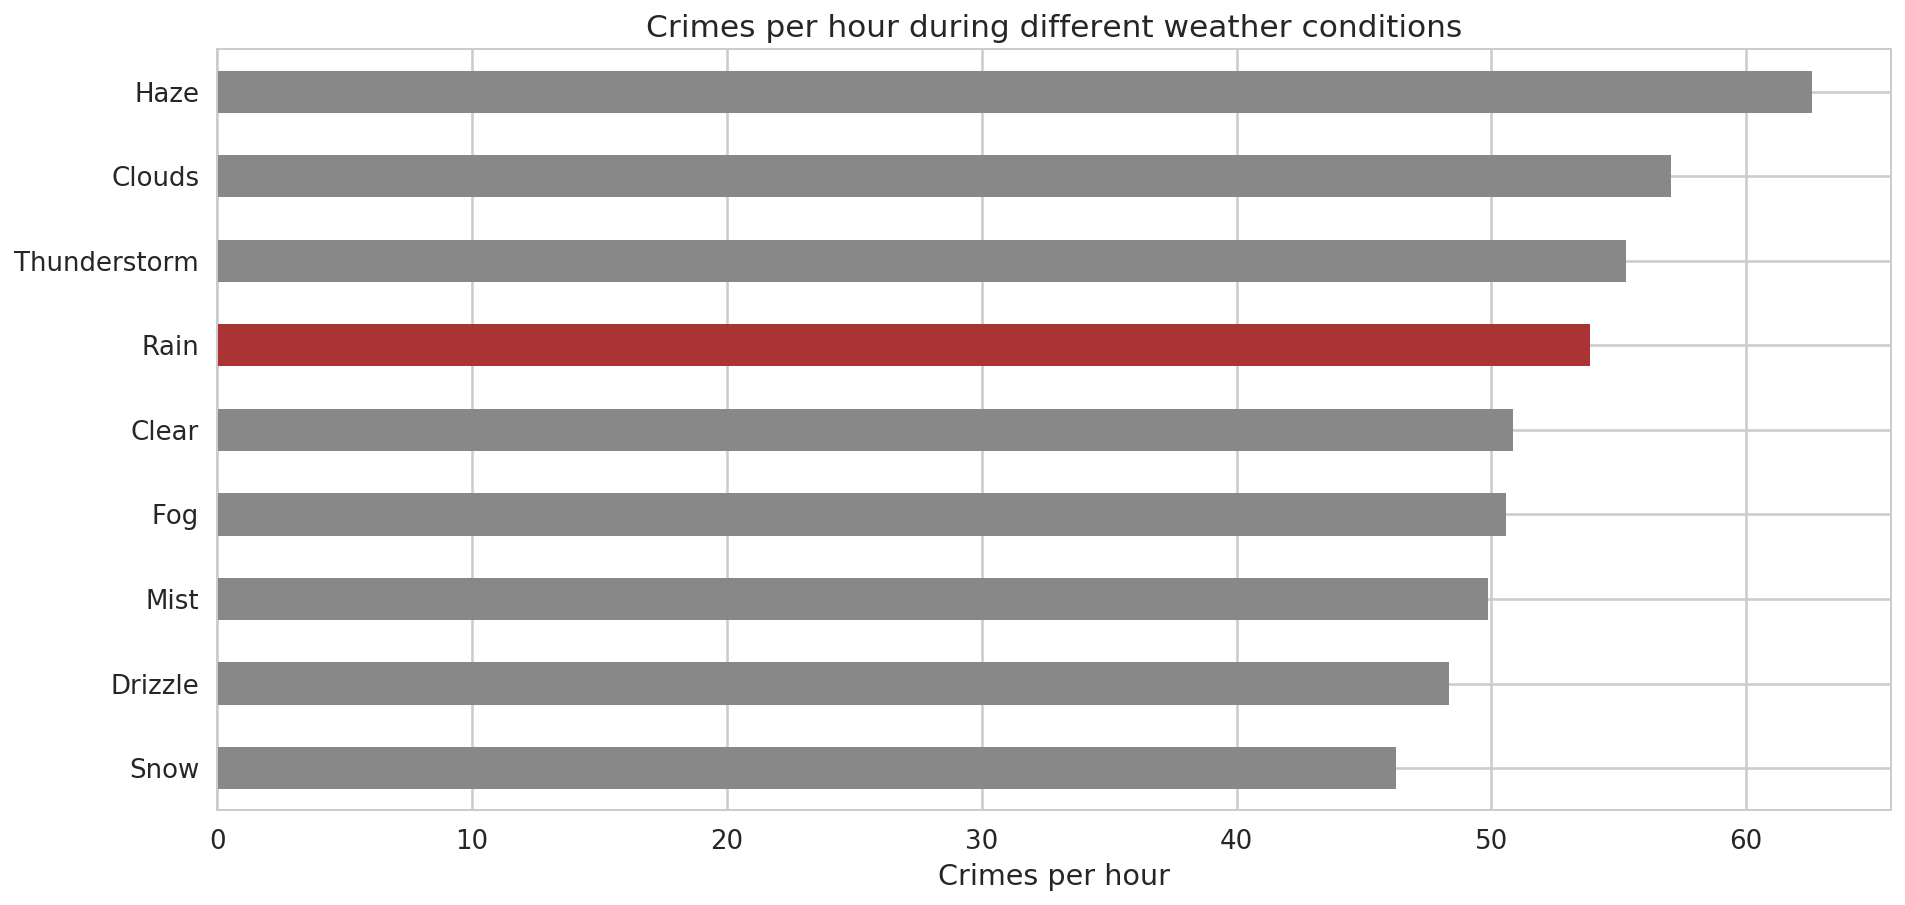

In [22]:
ax = weather_data2['crimes_per_hour'].sort_values().plot(
    kind='barh',
    color='LightBlue'
)
ax.set(xlabel='Crimes per hour', ylabel="", title='Crimes per hour during different weather conditions')

for bar in ax.patches:
    bar.set_facecolor('#888888')
    
pos = 5
ax.patches[pos].set_facecolor('#aa3333')

## Crimes per hour at different temperatures

Import Weather Data by Type

In [23]:
query_weather_temp = '''
SELECT temp, COUNT(*) as num_hours
FROM public.dwd_2019_group_d_weather
WHERE dt_iso >= %s AND dt_iso < %s
GROUP BY temp
ORDER BY num_hours DESC;
'''

In [24]:
%%time
df_weather_temp_hours = pd.read_sql(query_weather_temp, con=engine, params=(begin_date, end_date,))


CPU times: user 12.7 ms, sys: 34 µs, total: 12.7 ms
Wall time: 150 ms


In [25]:
df_weather_temp_hours["temp_c"] = df_weather_temp_hours["temp"] - 273
df_weather_temp_hours["temp_f"] = (df_weather_temp_hours["temp_c"] * 1.8) + 32
# df_weather_temp_hours

In [26]:
df_count_temp_crime = df_crimes_weather.groupby('temp').count()


In [27]:
df_count_temp_crime = df_weather_temp_hours.set_index('temp').join(df_count_temp_crime, lsuffix='l', on='temp')


In [28]:
df_count_temp_crime['crimes_per_hour'] = df_count_temp_crime['CMPLNT_NUM'] / df_count_temp_crime['num_hours']


[Text(0, 0.5, 'Crimes per hour'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Crimes rate increases in higher temperatures')]

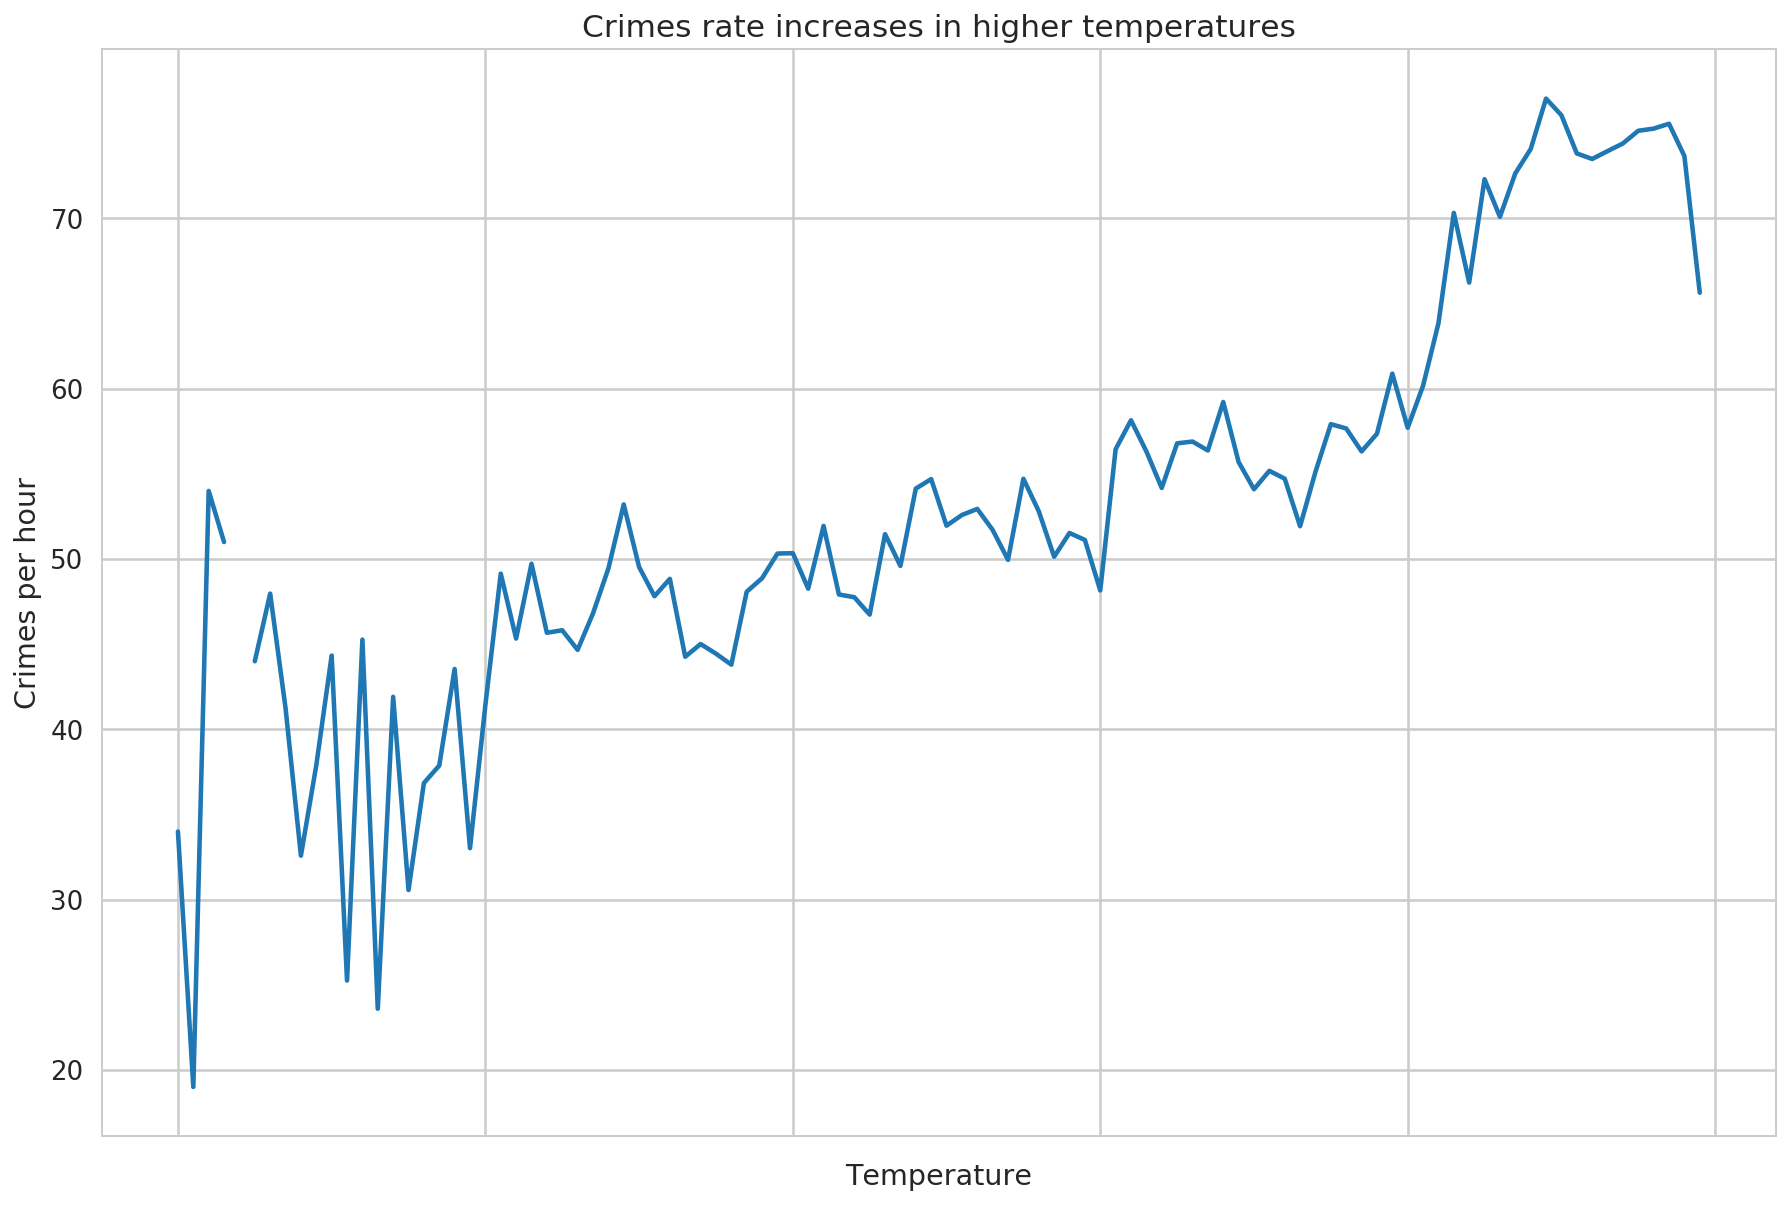

In [29]:
bins = 100
df_count_temp_crime_bins = df_count_temp_crime.groupby(pd.cut(df_count_temp_crime.index, bins=bins))['crimes_per_hour']
plt = df_count_temp_crime_bins.mean().plot(
    kind='line',
    figsize=(15,10)
)
plt.set(xlabel='Temperature', ylabel="Crimes per hour", title='Crimes rate increases in higher temperatures')


[]

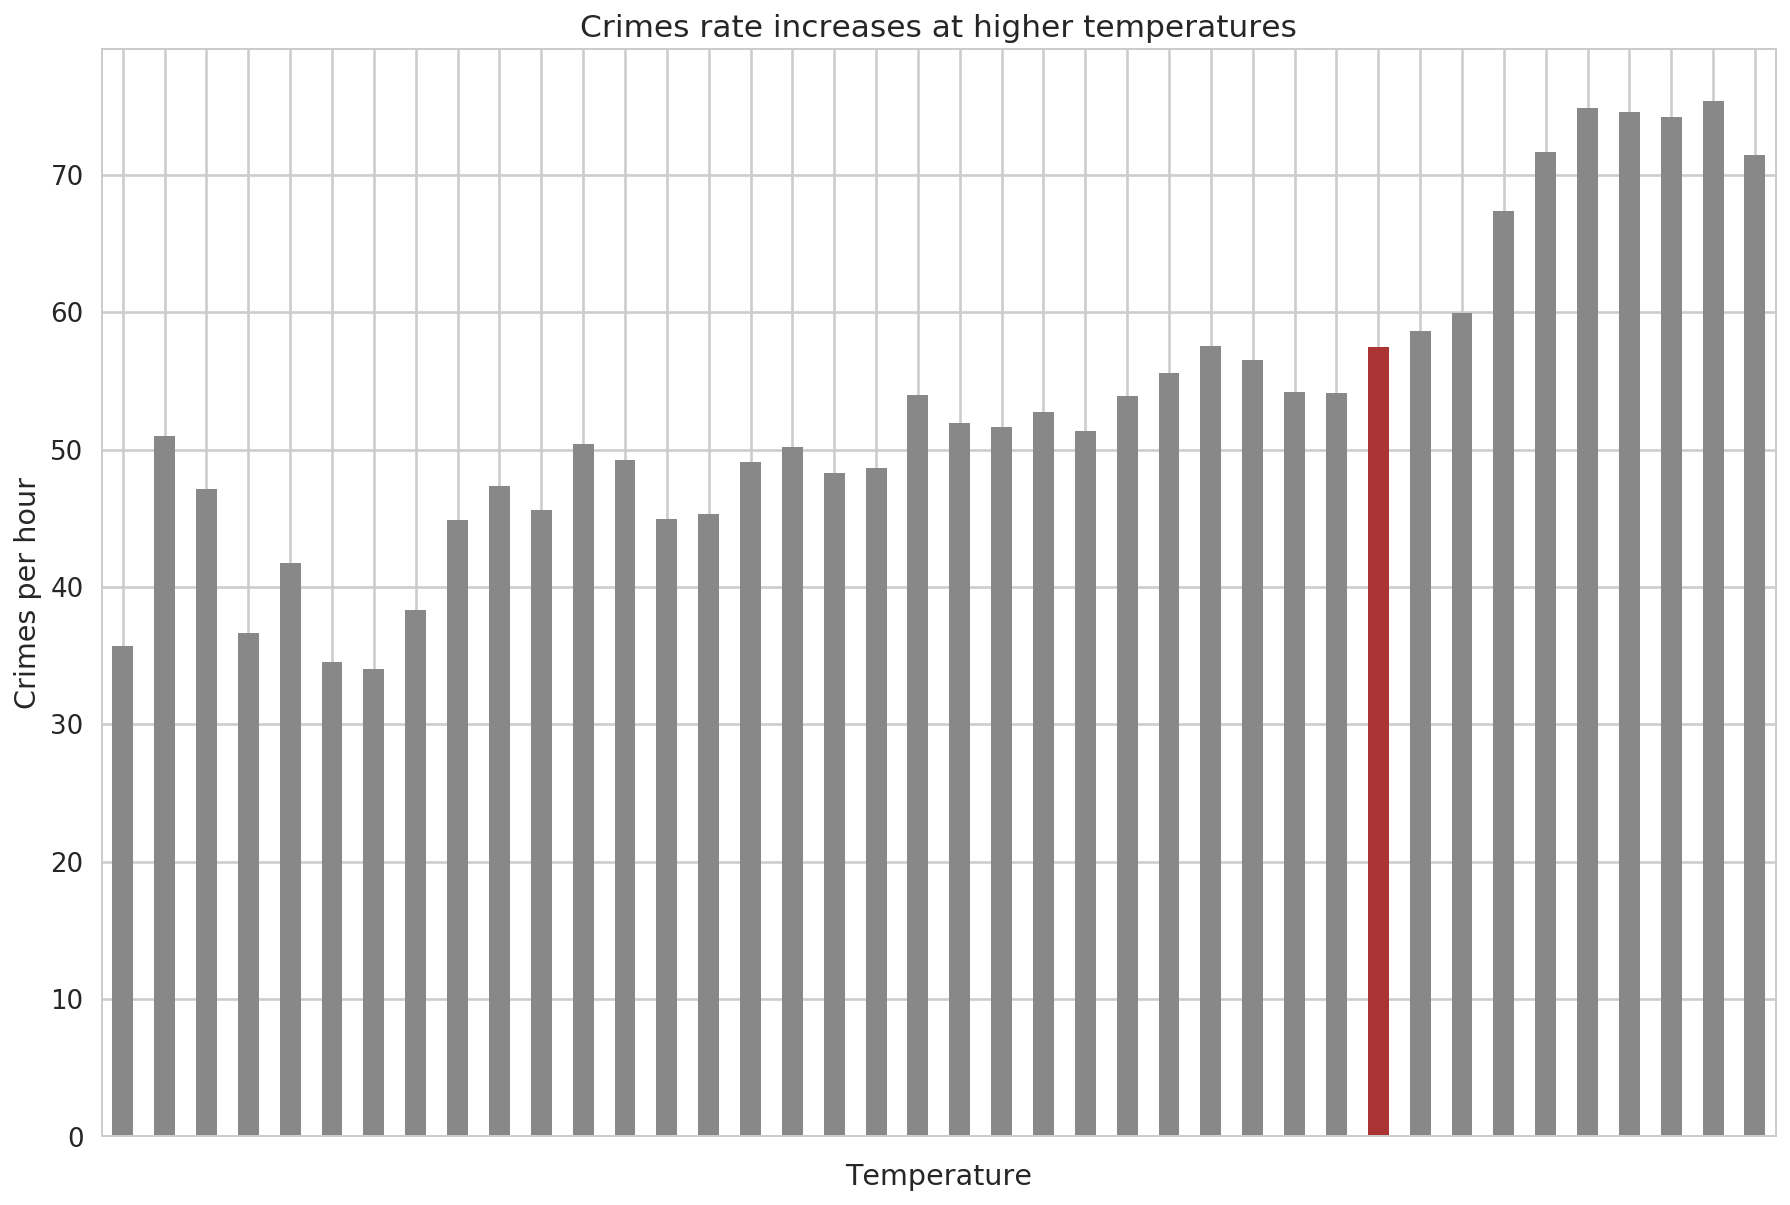

In [30]:
bins = 40
color = 'r'
df_count_temp_crime_bins = df_count_temp_crime.groupby(pd.cut(df_count_temp_crime.index, bins=bins))['crimes_per_hour']
plt = df_count_temp_crime_bins.mean().plot(
    kind='bar',
    figsize=(15,10),
    color=color
)
plt.set(xlabel='Temperature', ylabel="Crimes per hour", title='Crimes rate increases at higher temperatures')

for bar in plt.patches:
    bar.set_facecolor('#888888')
    
pos = 30
plt.patches[pos].set_facecolor('#aa3333')

# Hide X axis
plt.axes.get_xaxis().set_ticklabels([])


## Other Analyses

### Larceny

In [31]:
df_larceny_weather_crimes = df_crimes_weather.loc[
    (df_crimes_weather['OFNS_DESC'] == 'GRAND LARCENY') |
    (df_crimes_weather['OFNS_DESC'] == 'PETIT LARCENY')
]


In [32]:
df_count_larceny_temp_crime = df_larceny_weather_crimes.groupby('temp').count()


In [33]:
df_count_larceny_temp_crime = df_weather_temp_hours.set_index('temp').join(df_count_larceny_temp_crime, lsuffix='l', on='temp')


In [34]:
df_count_larceny_temp_crime['crimes_per_hour'] = df_count_larceny_temp_crime['CMPLNT_NUM'] / df_count_larceny_temp_crime['num_hours']


[]

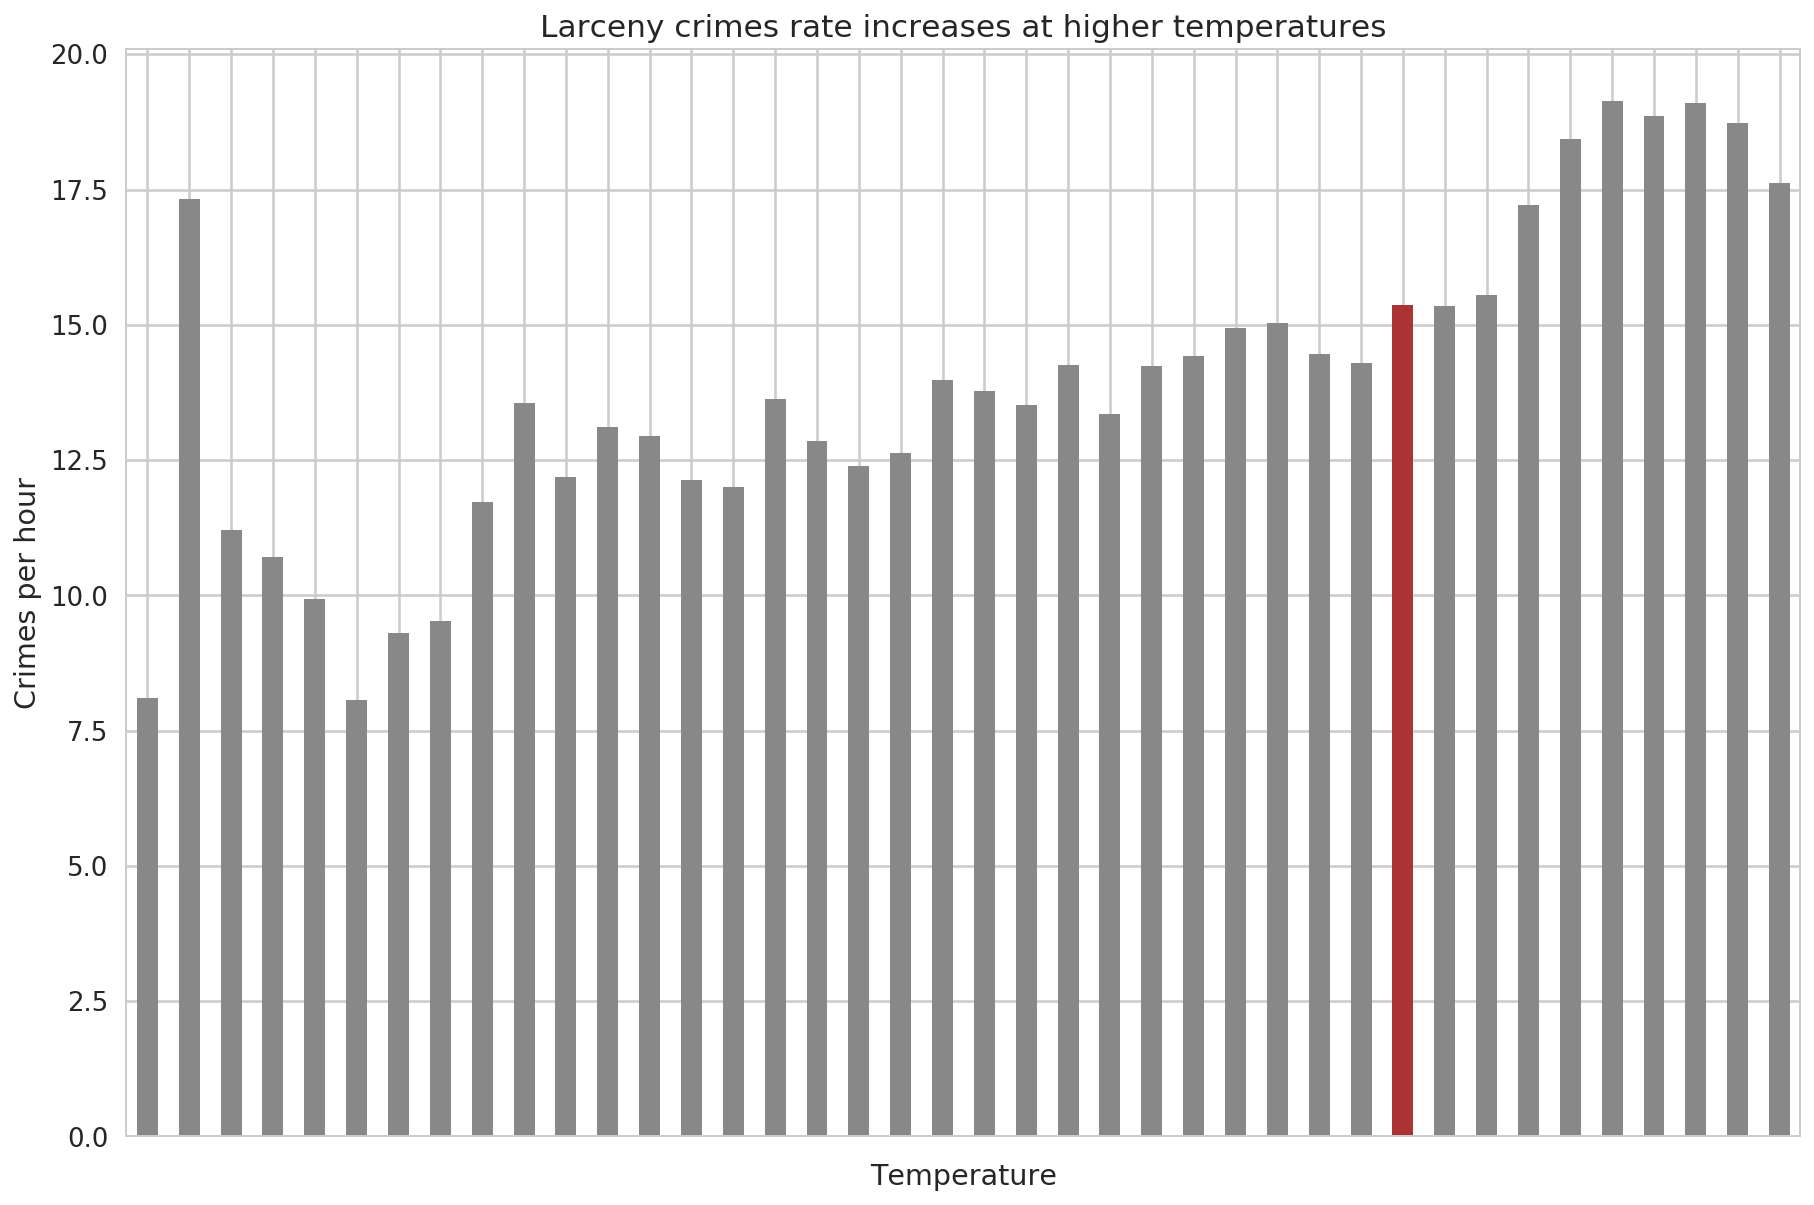

In [35]:
bins = 40
color = 'r'
df_count_larceny_temp_crime_bins = df_count_larceny_temp_crime.groupby(pd.cut(df_count_larceny_temp_crime.index, bins=bins))['crimes_per_hour']
plt2 = df_count_larceny_temp_crime_bins.mean().plot(
    kind='bar',
    figsize=(15,10),
    color=color
)
plt2.set(xlabel='Temperature', ylabel="Crimes per hour", title='Larceny crimes rate increases at higher temperatures')

for bar in plt2.patches:
    bar.set_facecolor('#888888')
    
pos = 30
plt2.patches[pos].set_facecolor('#aa3333')

# Hide X axis
plt2.axes.get_xaxis().set_ticklabels([])



### Big-7 Felonies

In [36]:
big_seven = [
    'GRAND LARCENY' 
    'ROBBERY'
    'FELONY ASSAULT' 
    'BURGLARY' 
    'GRAND LARCENY OF MOTOR VEHICLE' 
    'RAPE' 
    'MURDER & NON-NEGL. MANSLAUGHTER'
]

felonies = df_crimes_weather.loc[
    (df_crimes_weather.OFNS_DESC == 'GRAND LARCENY') |
    (df_crimes_weather.OFNS_DESC == 'ROBBERY') |
    (df_crimes_weather.OFNS_DESC == 'FELONY ASSAULT') |
    (df_crimes_weather.OFNS_DESC == 'BURGLARY') |
    (df_crimes_weather.OFNS_DESC == 'GRAND LARCENY OF MOTOR VEHICLE') |
    (df_crimes_weather.OFNS_DESC == 'RAPE') |
    (df_crimes_weather.OFNS_DESC == 'MURDER & NON-NEGL. MANSLAUGHTER')
]



In [37]:
felonies

,CMPLNT_NUM,CMPLNT_FR,CMPLNT_TO,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,snowed_1h,snowed_3h,snowed_24h,snowed_today,clouds_all,weather_id,weather_main,weather_description,temp_c,temp_f
2015-01-01 00:00:00,127615228,2015-01-01 00:30:00,2015-01-01 01:00:00,2015-01-01,109,GRAND LARCENY,406,"LARCENY,GRAND FROM PERSON, BAG OPEN/DIP",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,136102377,2015-01-01 00:05:00,2015-01-01 00:30:00,2015-07-30,104,RAPE,157,RAPE 1,COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,150847953,2015-01-01 00:00:00,2015-01-01 00:23:00,2015-01-01,106,FELONY ASSAULT,109,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,159558849,2015-01-01 00:30:00,2015-01-01 01:00:00,2015-01-01,109,GRAND LARCENY,411,"LARCENY,GRAND FROM EATERY, UNATTENDED",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,194110683,2015-01-01 00:15:00,NaT,2015-01-04,106,FELONY ASSAULT,109,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,213194762,2015-01-01 00:00:00,2015-01-01 00:05:00,2015-01-01,107,BURGLARY,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,224951949,2015-01-01 00:45:00,2015-01-01 00:50:00,2015-01-01,109,GRAND LARCENY,411,"LARCENY,GRAND FROM EATERY, UNATTENDED",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,252281689,2015-01-01 00:01:00,2015-05-23 12:00:00,2015-05-23,104,RAPE,157,RAPE 1,COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,253779977,2015-01-01 00:09:00,2015-01-01 07:00:00,2015-01-01,107,BURGLARY,213,"BURGLARY,COMMERCIAL,NIGHT",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090
2015-01-01 00:00:00,275656695,2015-01-01 00:00:00,2015-06-01 00:00:00,2016-09-06,109,GRAND LARCENY,422,"LARCENY,GRAND BY OPEN CREDIT CARD (NEW ACCT)",COMPLETED,FELONY,...,None,None,None,None,0,800,Clear,Sky is Clear,-4.95,23.090


In [38]:
felonies['OFNS_DESC'].value_counts()

GRAND LARCENY                      100846
FELONY ASSAULT                      47378
ROBBERY                             37510
BURGLARY                            32700
GRAND LARCENY OF MOTOR VEHICLE      15647
RAPE                                 2818
MURDER & NON-NEGL. MANSLAUGHTER       729
Name: OFNS_DESC, dtype: int64

In [39]:
grouped = felonies.groupby('weather_main').count()

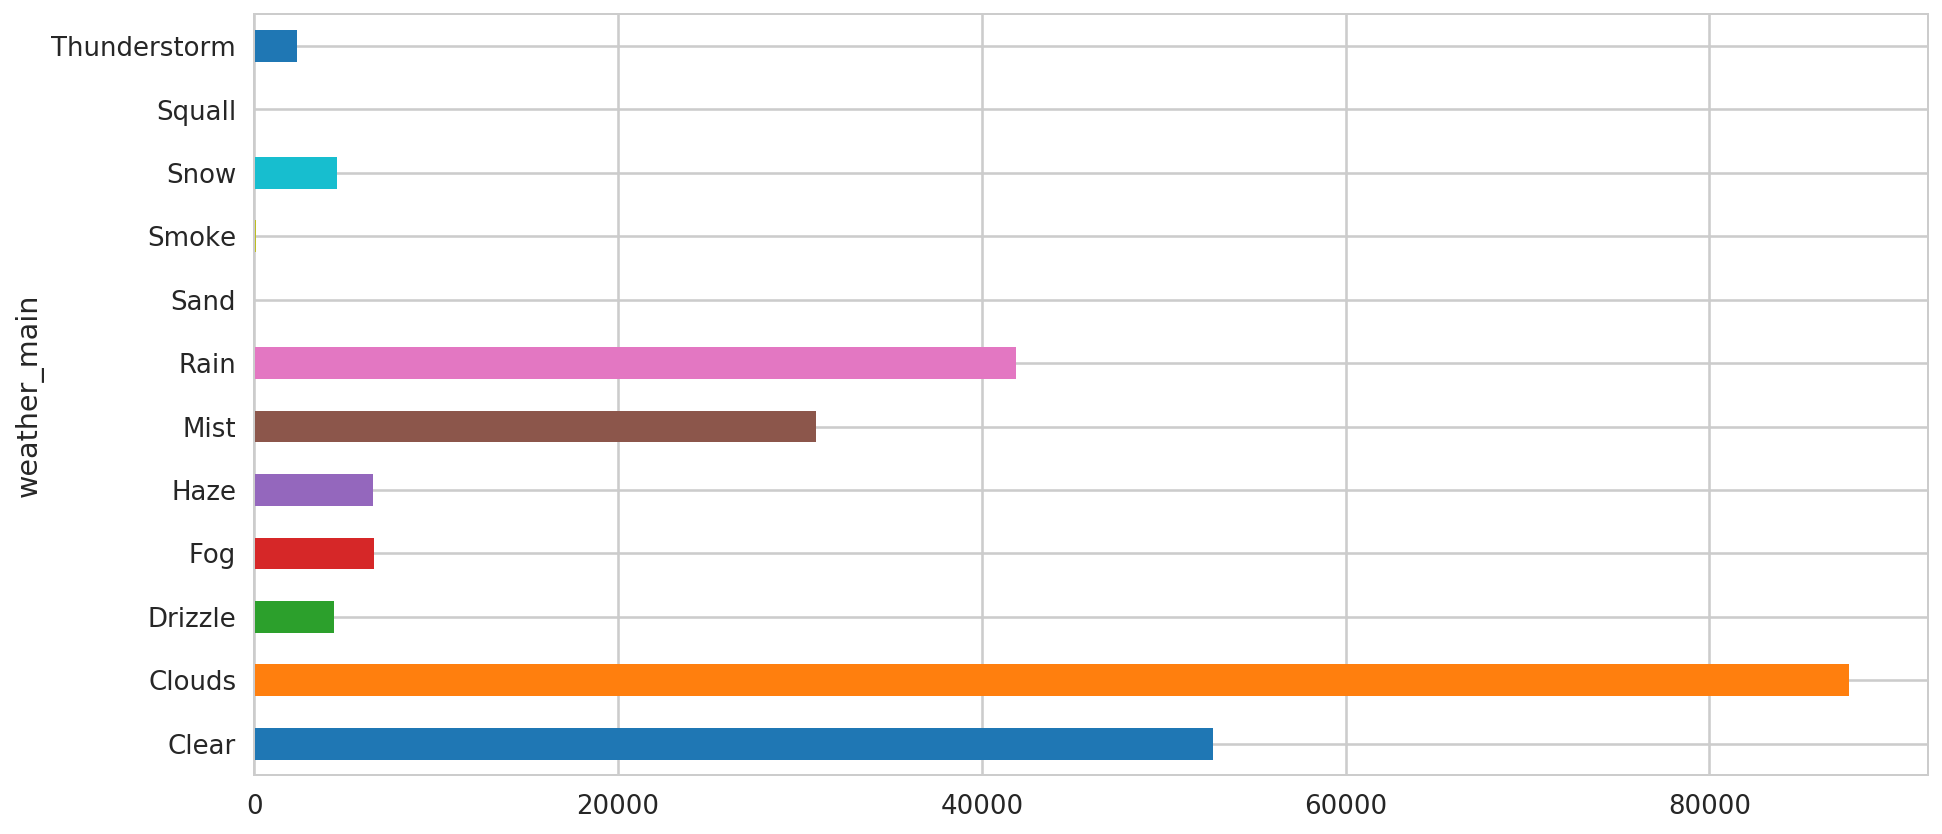

In [40]:
grouped['CMPLNT_NUM'].plot(kind='barh')

### Percent of crime in "bad" weather conditions

In [41]:
snow_crimes = df_crimes_weather.loc[df_crimes_weather.weather_main == "Snow"]

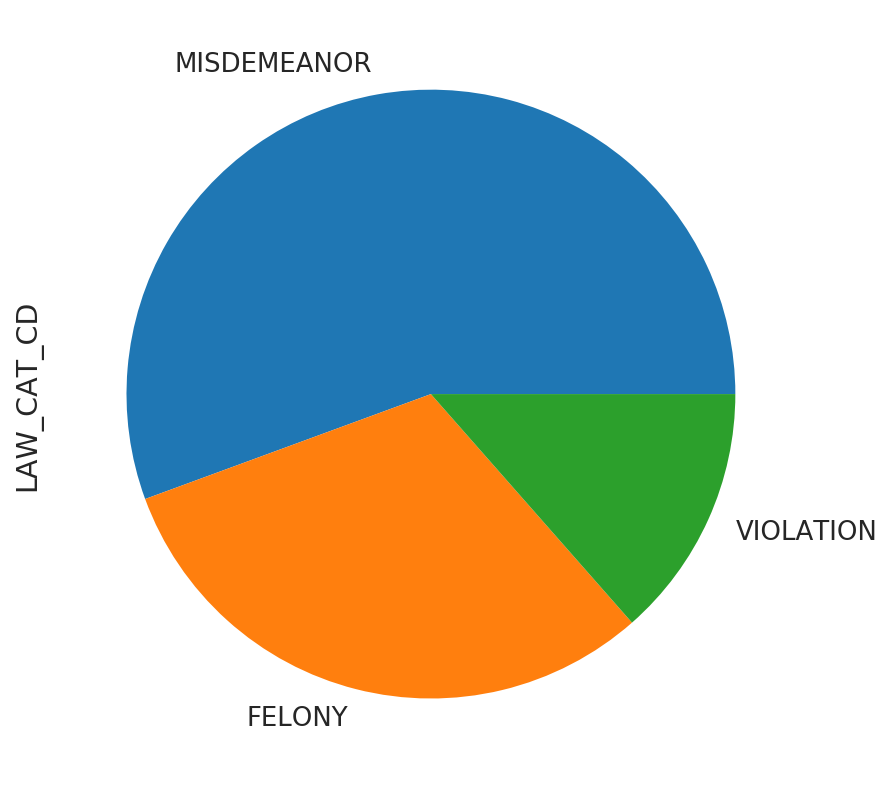

In [42]:
snow_crimes['LAW_CAT_CD'].value_counts().plot.pie()

In [45]:
rain_crimes = df_crimes_weather.loc[df_crimes_weather.weather_main == "Rain"]

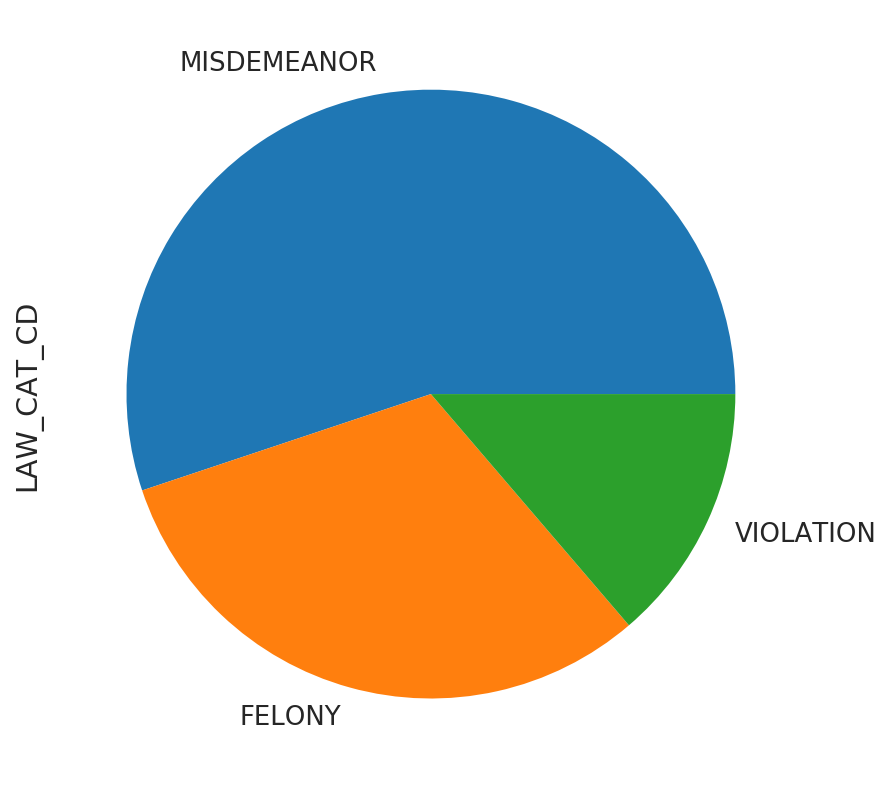

In [46]:
rain_crimes['LAW_CAT_CD'].value_counts().plot.pie()

In [47]:
clear_crimes = df_crimes_weather.loc[df_crimes_weather.weather_main == "Clear"]

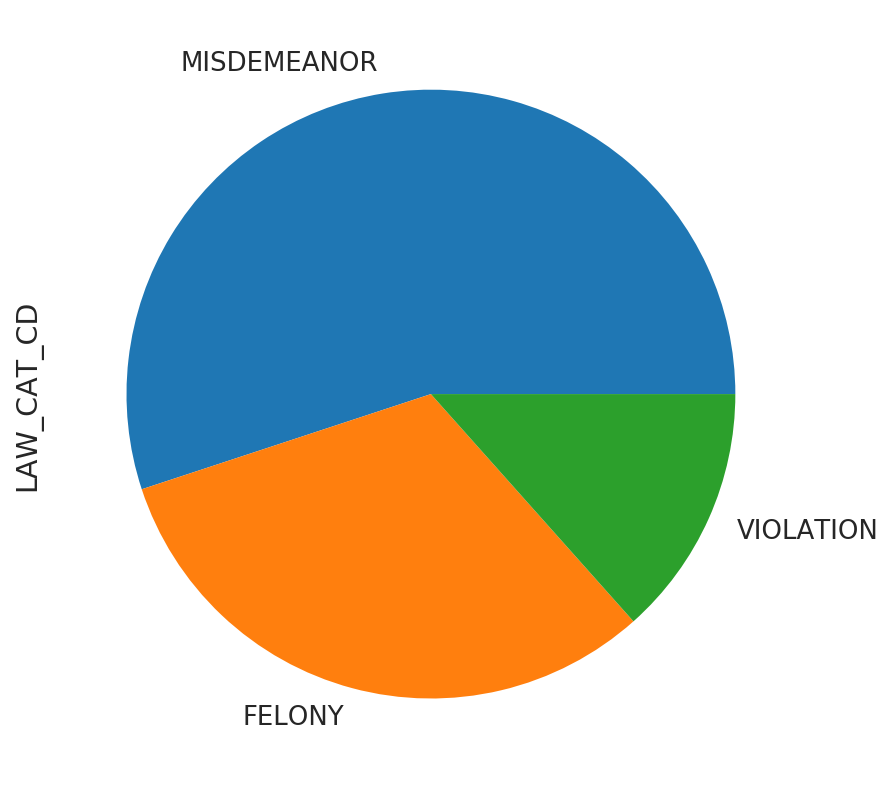

In [48]:
clear_crimes['LAW_CAT_CD'].value_counts().plot.pie()

## Severity of crimes in different weather conditions

In [43]:
df_crimes_weather

dfp = pd.pivot_table(data = df_crimes_weather, index='weather_main', columns='LAW_CAT_CD', values='CMPLNT_NUM', aggfunc='count')


[Text(0, 0.5, 'Ratio'),
 Text(0.5, 0, 'Weather Type'),
 Text(0.5, 1.0, 'Crime type per weather condition')]

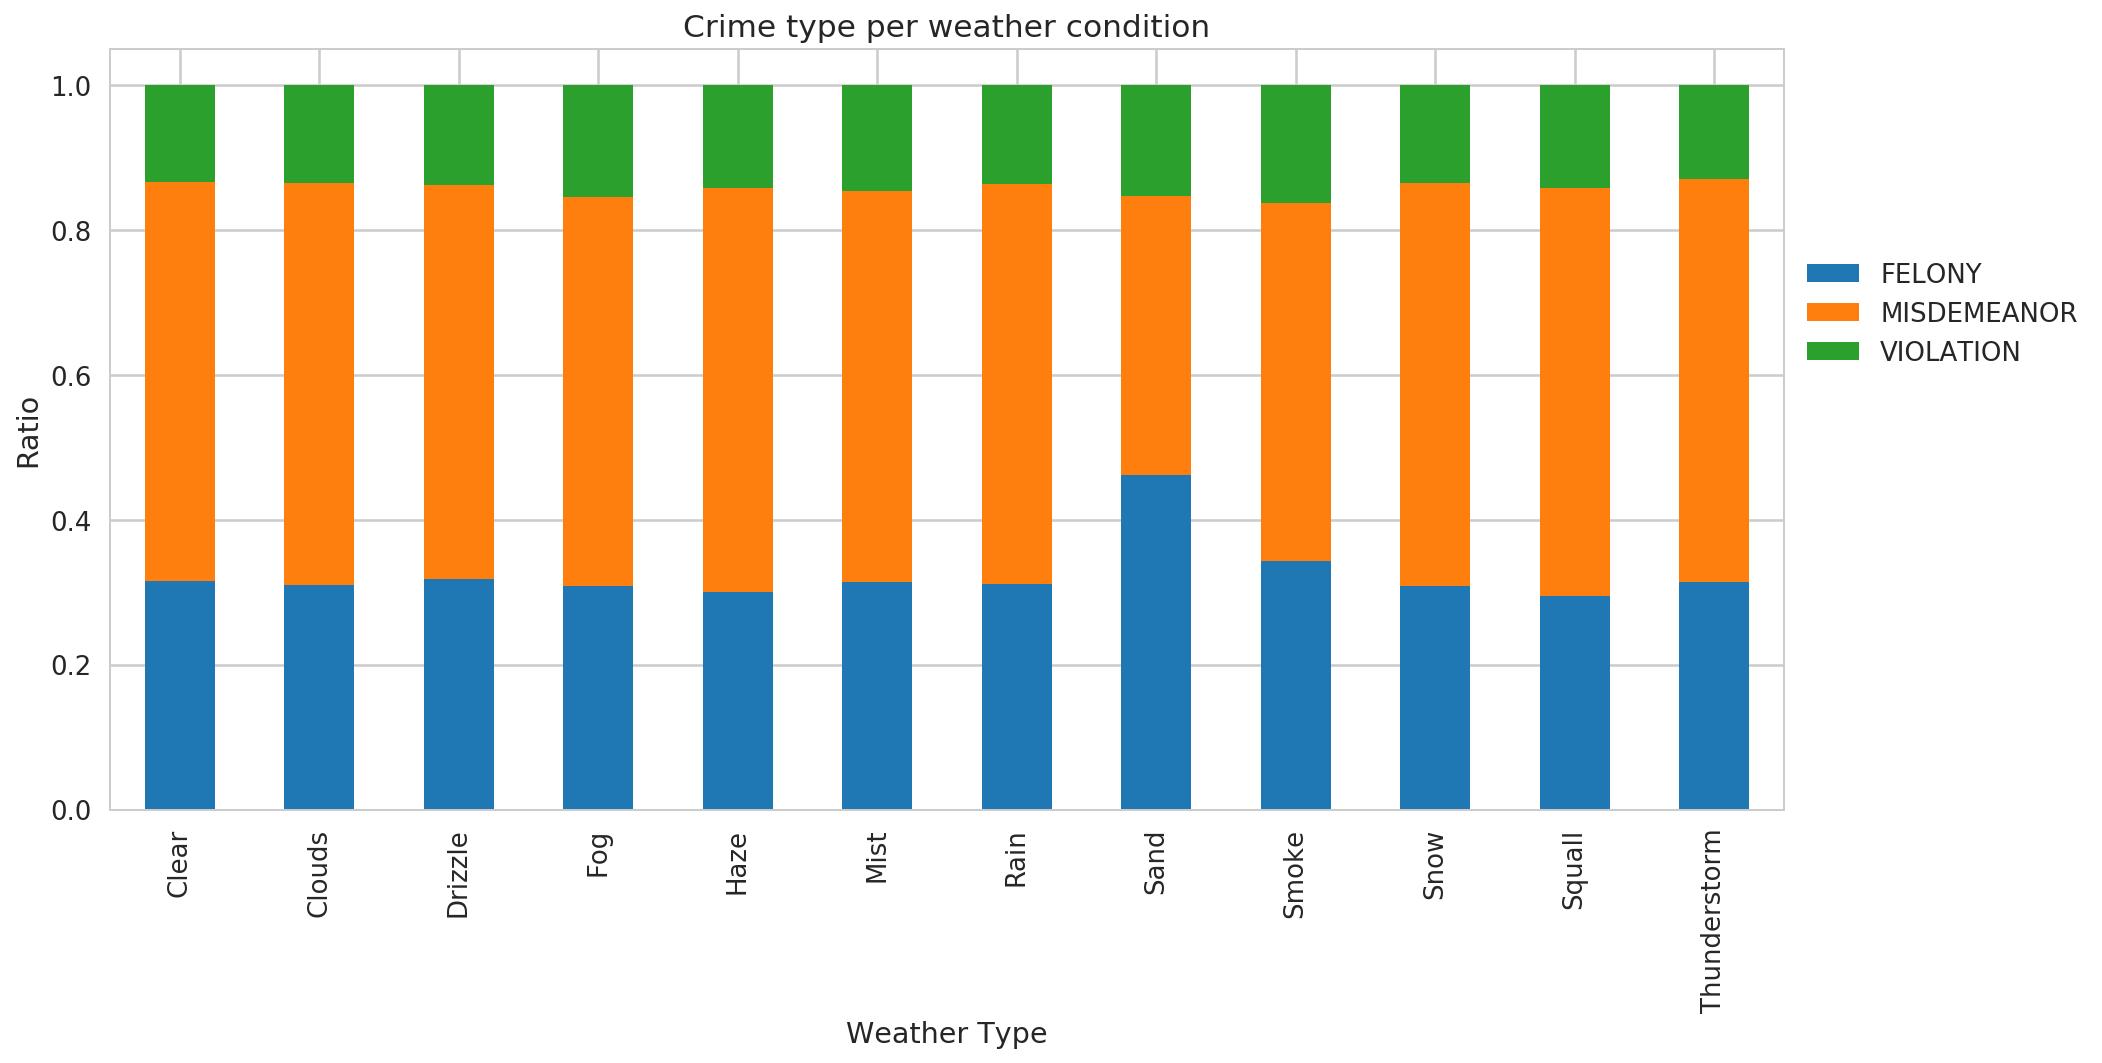

In [44]:
# dfp.plot(kind="bar", subplots=True, layout=(3,3), figsize=(15, 15))
# dfp.plot(kind="bar")

dfp_norm = dfp.T / dfp.T.sum()

ax_dfp = dfp_norm.T.plot(
    kind="bar",
    stacked=True
)
ax_dfp.legend(bbox_to_anchor=(1, 0.75))

ax_dfp.set(xlabel='Weather Type', ylabel="Ratio", title='Crime type per weather condition')


